In [36]:
# Initialize Otter
import otter
grader = otter.Notebook("lab03.ipynb")

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen <br>
        Alan Liang <br>
        Umar Maniku <br>
        Akhil Venkatesh <br>
</table>

<!-- BEGIN QUESTION -->

# Lab 3: Taxes, Government Intervention, and Welfare

<!-- END QUESTION -->

In [37]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
%matplotlib inline

## Question 1: Beer Taxes: An Empirical Study

Many states in the United States impose an excise and an ad valorem tax on the consumption of beer. According to the Beer Institute, “taxes are the single most expensive ingredient in beer, costing more than the labor and raw materials combined.” In fact, approximately 40 percent of the retail price of beer is dedicated toward covering all the applicable taxes. 

Throughout this exercise, you will investigate how salient consumers are to changes in taxes on beer. Typically, the ad valorem tax on beer is not reflected in the label price, like typical sales taxes in the US. However, the excise tax is included in the label price. 

This study on consumer salience towards taxes is taken from [_Salience and Taxation: Theory and Evidence_](https://www.aeaweb.org/articles?id=10.1257/aer.99.4.1145) by Chetty, Looney, and Kroft (AER 2010). 

**Question 1.1:**
In the paper *Salience and Taxation: Theory and Evidence*, the authors also investigate consumer salience towards taxes through a field experiment by posting tax-inclusive price tags, and find that doing so reduces demand by 8 percent. What does this imply about consumer salience in relation to the decrease in demand?


a. Including the tax in the price tag does not change the actual price of the good, but only the label price. Since demand decreases when including the tax in the price, we can conclude that not all consumers are aware of the tax.
<br>
b. Including the tax in the price tag does not change the actual price of the good, but only the label price. Since demand increases when including the tax in the price, we can conclude that not all consumers are aware of the tax.
<br>
c. Including the tax in the price tag changes the actual price of the good. Since demand decreases when including the tax in the price, we can conclude that all consumers are aware of the tax.
<br>
d. Including the tax in the price tag changes the actual price of the good, but only the signaling price. Since demand increases when including the tax in the price, we can conclude that not all consumers are aware of the tax.

In [38]:
q1_1 = 'a'

In [39]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Let's load in a table about beer sales across the 50 states from 1970 to 2003.

The table `beer_raw` includes 7 columns:
- `st_name`: the state abbreviation
- `year`: the year the data was recorded
- `c_beer`: the quantity of beer consumed in gallons (in thousands of gallons)
- `beer_tax`: the ad valorem tax as a percentage
- `btax_dollars`: the excise tax, represented in dollars per case of beer (24 cans)
- `population`: the population of the state (in thousands)
- `salestax`: the sales tax percentage

In [40]:
beer_raw = Table.read_table("beer_tax.csv")
beer_raw

st_name,year,c_beer,beer_tax,btax_dollars,population,salestax
AL,1970,33098,72.3411,2.37,3450,4
AL,1971,37598,69.3046,2.37,3497,4
AL,1972,42719,67.1492,2.37,3539,4
AL,1973,46203,63.217,2.37,3580,4
AL,1974,49769,56.9338,2.37,3627,4
AL,1975,53236,52.1717,2.37,3679,4
AL,1976,54992,49.3293,2.37,3735,4
AL,1977,62317,46.3174,2.37,3780,4
AL,1978,62725,43.0496,2.37,3832,4
AL,1979,63999,38.6617,2.37,3866,4


**Question 1.2:**
Consumption across states vary widely due to differences in population. Let's normalize this by adding a column called `pc_beer`, representing the per capita (per person) consumption of beer in each year for each state, to `beer_raw`. Call the resulting table `beer`.


In [41]:
pc_beer_column = beer_raw.column("c_beer")/beer_raw.column("population")
beer = beer_raw.with_column("pc_beer", pc_beer_column)
beer

st_name,year,c_beer,beer_tax,btax_dollars,population,salestax,pc_beer
AL,1970,33098,72.3411,2.37,3450,4,9.59362
AL,1971,37598,69.3046,2.37,3497,4,10.7515
AL,1972,42719,67.1492,2.37,3539,4,12.0709
AL,1973,46203,63.217,2.37,3580,4,12.9059
AL,1974,49769,56.9338,2.37,3627,4,13.7218
AL,1975,53236,52.1717,2.37,3679,4,14.4702
AL,1976,54992,49.3293,2.37,3735,4,14.7234
AL,1977,62317,46.3174,2.37,3780,4,16.486
AL,1978,62725,43.0496,2.37,3832,4,16.3687
AL,1979,63999,38.6617,2.37,3866,4,16.5543


In [42]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3:**
For the rest of this question, we will restrict our analysis to only one state - California. Assign `beer_state` to a filtered table with only data describing California.


In [43]:
beer_state = beer.where("st_name", are.equal_to("CA"))
beer_state

st_name,year,c_beer,beer_tax,btax_dollars,population,salestax,pc_beer
CA,1970,363645,2.74713,0.09,20023,5,18.1614
CA,1971,380397,2.63182,0.09,20346,5,18.6964
CA,1972,401928,2.54997,0.09,20585,5,19.5253
CA,1973,417463,2.40065,0.09,20869,5.167,20.004
CA,1974,464237,2.16204,0.09,21174,5.25,21.9249
CA,1975,466420,1.9812,0.09,21538,6,21.6557
CA,1976,496869,1.87326,0.09,21936,6,22.6508
CA,1977,503361,1.75889,0.09,22352,6,22.5197
CA,1978,533487,1.6348,0.09,22836,6,23.3617
CA,1979,572605,1.46816,0.09,23257,6,24.6208


In [44]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4:**
To determine consumers' sensitivity to a change in taxes, we need to determine the changes in ad valorem taxes between each year and the corresponding change in the per capita beer consumption. Construct a new table `beer_state_changes` with these  2 columns: `tax_diff` and `consumption_diff`.

_Hint:_ Use `np.diff`.


In [52]:
tax_diff = np.diff(beer_state.column("salestax"))
per_capita_consumption_diff = np.diff(beer_state.column("pc_beer"))
beer_state_changes = Table().with_columns("tax_diff", tax_diff, "consumption_diff", per_capita_consumption_diff)
beer_state_changes.show(33)

tax_diff,consumption_diff
0,0.535038
0,0.828883
0.167,0.478692
0.083,1.92088
0.75,-0.269182
0,0.99517
0,-0.131118
0,0.841936
0,1.25909
0,0.406849


In [46]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5:**
Now we are ready to plot our results. What kind of graph will be most appropriate to denote the relationship between changes in taxes and changes in consumption?

<ol style="list-style-type: lower-alpha;">
    <li>Line plot</li>
    <li>Histogram</li>
    <li>Scatter plot</li>
    <li>Bar chart</li>
</ol>

Assign `q5` to letter corresponding to your choice.


In [47]:
q1_5 = 'c'

In [48]:
grader.check("q1_5")

q1_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.6:**
Plot the results from `beer_state_changes` using a scatter plot.


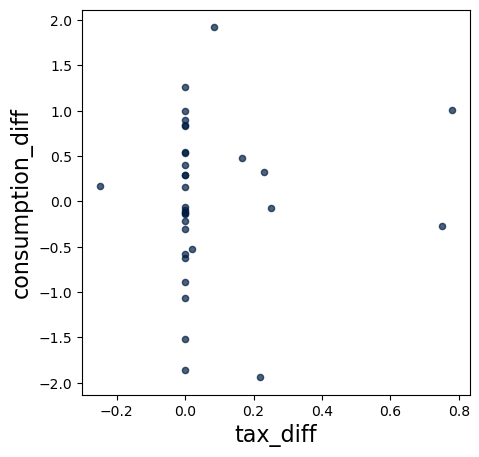

In [49]:
beer_state_changes.scatter(0, 1)

<!-- END QUESTION -->



We will conduct a linear regression to determine the slope and intercept.

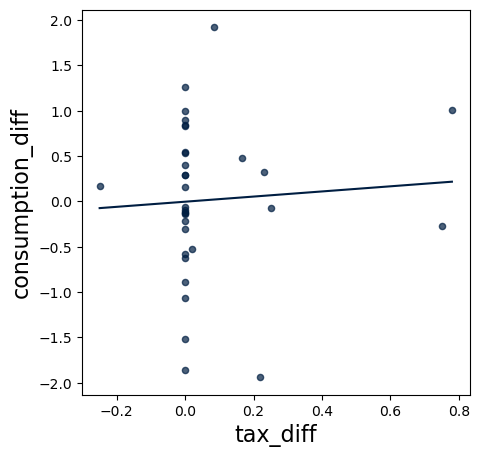

In [50]:
beer_state_changes.scatter(0, 1, fit_line=True)

What are the values of the intercept and slope terms? 

To answer this, we can use `np.polyfit` with degree 1, which returns the slope and intercept terms in that order.

In [51]:
np.polyfit(x = beer_state_changes.column("tax_diff"), y=beer_state_changes.column("consumption_diff"), deg=1)

array([ 0.28269135, -0.00278201])

<!-- BEGIN QUESTION -->

**Question 1.7:**
Interpret the slope and intercept values from the previous part in context of this dataset. What is the relationship between changes in taxes and changes in per capita beer consumption? If you were to attribute the relationship to causality, what would the effect of a tax be?

_When the sales tax percentage is 0.25 less than it was the previous year, there are 0.00278201 less gallons of beer consumed per person in California. For each 1% increase in tax, there are 0.28269135 more gallons of beer consumed per person in California. <br><br> As taxes increase, the consumption of beer increases too. <br><br> If I were to attribute the relationship to causality, I would say an increase in tax causes an increase in beer consumption per capita._

<!-- END QUESTION -->

Now let's see if the phenomenon applies to all states, across all years.



/tmp/ipykernel_146/2250851820.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  differences = data.groupby("st_name").apply(state_group)


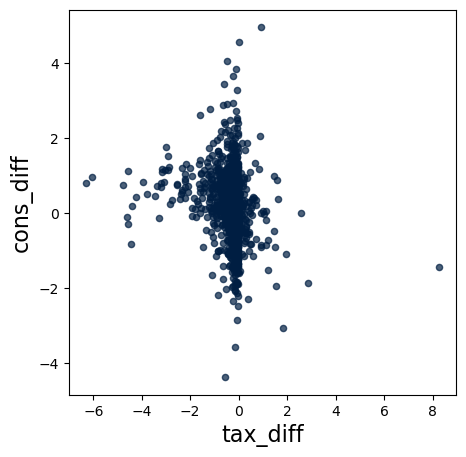

In [53]:
# You do not have to understand how the code below works, but it works very similarly to what you've done above!
import pandas as pd
data = pd.read_stata("alcohol_data.dta")
data = data[["st_name", "year", "c_beer", "population", "beer_tax", "salestax"]]
data['beer_pc'] = data.c_beer / data.population
data = data.dropna(axis = 0)
def state_group(df):
    tax_diff = np.diff(df["beer_tax"])
    cons_diff = np.diff(df["beer_pc"])
    return pd.DataFrame({"tax_diff": tax_diff, "cons_diff": cons_diff})
differences = data.groupby("st_name").apply(state_group)
diff = Table.from_df(differences)
diff.scatter(0, 1)

The data seems to be a little messy, but a downward sloping trend seems to appear. Nonetheless, let's try to clean it up a little. 

We will aggregate the data based on state so that each state will be one data point. Each point represents a state's average change in taxes and consumption across the years.

/tmp/ipykernel_146/2161240845.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  differences = data.groupby("st_name").apply(state_group)


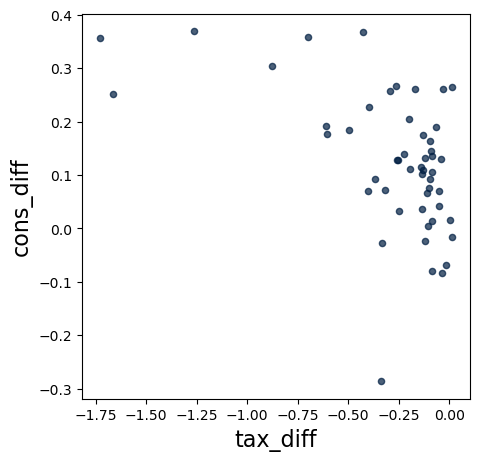

In [54]:
# You also do not have to understand how the code below works.
def state_group(df):
    tax_diff = np.mean(np.diff(df["beer_tax"]))
    cons_diff = np.mean(np.diff(df["beer_pc"]))
    return pd.DataFrame({"tax_diff": tax_diff, "cons_diff": cons_diff}, index=[0])
differences = data.groupby("st_name").apply(state_group)
diff = Table.from_df(differences)
diff.scatter(0, 1)

<!-- BEGIN QUESTION -->

**Qustion 1.8:**
Up until now, we've been examining the effect of changes in the ad valorem tax on beer consumption. But what about the excise tax? Unlike ad valorem taxes, an excise tax is included as part of the label price.

Intuitively, do you expect consumers be more elastic towards changes in the ad valorem tax or excise tax? Why?


_I expect customers to be more elastic towards changes in the excise tax because the change is easily noticeable in the price tag. An increase in excise tax means an increase on the price tag, which leads to less consumtpion. A decrease in excise tax means a decrease on the price tag, which leads to more consumtpion._

<!-- END QUESTION -->

Let's put this theory to the test. Each row in the table `excise_changes` displays an event in which there was a change in the excise tax, and its corresponding change in beer consumption. For example, from the table we can see that Arkansas has historically changed its beer excise tax three times. 

In [59]:
# You do not need to understand how this code works.
excise_changes = pd.DataFrame({"st_name":[], "excise_tax_change":[], "c_beer_change":[]})
beer_df = beer.to_df()
for row_index in range(beer_df.shape[0]):
    if row_index == 0:
        continue
    if beer_df.iloc[row_index, 4] != beer_df.iloc[row_index-1, 4] and beer_df.iloc[row_index, 0] == beer_df.iloc[row_index-1, 0]:
        excise_changes = pd.concat([excise_changes, pd.DataFrame({"st_name": beer_df.iloc[row_index, 0], 
                                                "excise_tax_change": beer_df.iloc[row_index, 4] - beer_df.iloc[row_index-1, 4],
                                                "c_beer_change": beer_df.iloc[row_index, 7] - beer_df.iloc[row_index-1, 7]}, index=[row_index])], ignore_index=True)
excise_changes = Table.from_df(excise_changes[["st_name", "excise_tax_change", "c_beer_change"]])
excise_changes.show(131)

st_name,excise_tax_change,c_beer_change
AK,0.0938,0.338124
AK,0.1312,-0.894734
AK,1.62,-1.44731
AZ,0.09,-0.850621
AZ,0.09,2.05028
CA,0.18,-1.93796
CA,0.18,1.00325
CO,0.0225,0.643899
CO,0.0225,-0.420914
CT,0.0157,1.06804


In [61]:
min(excise_changes.column('excise_tax_change'))

-0.096099999999999963

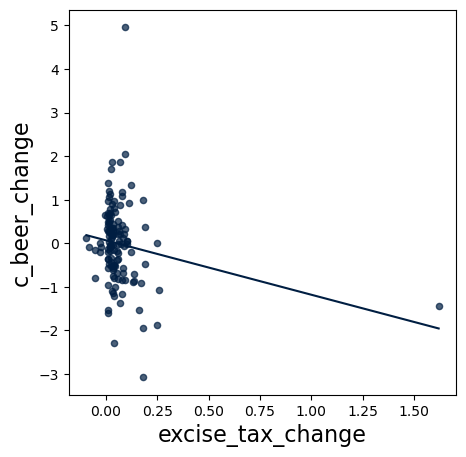

In [56]:
excise_changes.scatter(1,2,fit_line=True)

**Question 1.9.1:**
Using `np.polyfit`, determine the slope and intercept terms for this regression on the table `excise_changes`.

Recall that `np.polyfit` follows the syntax: `np.polyfit(<x array>, <y array>, <degree>)`.


In [57]:
coeffs = np.polyfit(excise_changes.column(1), excise_changes.column(2), 1)
coeffs

array([-1.24731534,  0.06714415])

In [58]:
grader.check("q1_9_1")

q1_9_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.9.2:**
Interpret the results above from `np.polyfit`.

*Hint:* Be aware of the units of the excise tax!


_When the excise tax is 0.961 dollars less than it was the previous year, there are 0.06714415 more gallons of beer consumed per person. For each 1.00 dollar increase in excise tax, there are 1.24731534 fewer gallons of beer consumed per person._

<!-- END QUESTION -->

## Question 2: Tax Equilibria with SymPy

*From Gruber, Ch.19, Q.4*

The demand for football tickets is $Q = 360 − 10P$ and the supply of football tickets is $Q = 20P$. 

**Question 2.1:**
Calculate the quantity and price at the equilibrium. Assign these values to `quantity_no_tax` and `price_no_tax`, respectively.


In [80]:
P = sympy.Symbol("P")
supply = 20*P
demand = 360-10*P
price_no_tax = solve(supply, demand)
quantity_no_tax = demand.subs(P, price_no_tax)
print("The equilibrium price is", price_no_tax, "; the equilibrium quantity is", quantity_no_tax)

The equilibrium price is 12 ; the equilibrium quantity is 240


In [81]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2:**
Assume that the government implements a per-ticket tax of $4 when consumers purchase a ticket. What is the new price received by producers and price paid by consumers?


In [84]:
demand_with_tax = 360-10*(P+4)
price_received_with_tax = solve(supply, demand_with_tax)
price_paid_demand_with_tax = solve(supply, demand_with_tax)+4
print("The new price received by producers is", price_received_with_tax, 
      "; the new price paid by consumers is", price_paid_demand_with_tax)

The new price received by producers is 32/3 ; the new price paid by consumers is 44/3


In [85]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.1:** How much less revenue does the producer receive per unit? Format your answer as a negative number, so that it represents the change in revenue per unit.

In [86]:
change_in_price_received = price_received_with_tax - price_no_tax # SOLUTION
change_in_price_received

-4/3

In [87]:
grader.check("q2_3_1")

q2_3_1 results: All test cases passed!

**Question 2.3.2:** How much more does the consumer pay per unit? Format your answer as a positive number, so that it represents the change in cost per unit.

In [88]:
change_in_price_paid = price_paid_demand_with_tax - price_no_tax # SOLUTION
change_in_price_paid

8/3

In [89]:
grader.check("q2_3_2")

q2_3_2 results: All test cases passed!

**Question 2.3.3:** Who bears a larger burden burden of the tax? Assign `q2_3_3` to `'consumers'` or `'producers'`.

In [90]:
q2_3_3 = 'consumers' # SOLUTION

In [91]:
grader.check("q2_3_3")

q2_3_3 results: All test cases passed!

**Question 2.4:**
Continue to assume that the government implements a per-ticket tax of \$4. How many less tickets are sold due to the tax?


In [100]:
quantity_with_tax = demand.subs(P, price_paid_demand_with_tax)
difference_in_quantity = quantity_no_tax - quantity_with_tax
print("The difference in quantity transacted is", difference_in_quantity)

The difference in quantity transacted is 80/3


In [101]:
grader.check("q2_4")

q2_4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [102]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_3 results: All test cases passed!

    q1_4 results: All test cases passed!

    q1_5 results: All test cases passed!

    q1_9_1 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_2 results: All test cases passed!

    q2_3_1 results: All test cases passed!

    q2_3_2 results: All test cases passed!

    q2_3_3 results: All test cases passed!

    q2_4 results: All test cases passed!
